# 시각화 샘플

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(
    font='AppleGothic',
    rc={'axes.unicode_minus': False},
    style='darkgrid',
)

### 연령별 지역화폐 사용 빈도 현황   
2019년 경기도 시군구 연령별 월 단위 지역화폐 사용 빈도 현황   
2019.03 ~ 2019.09

In [3]:
df_age = pd.read_csv('TP_AGE_ACCTO_LCRCY_USE_FQ.csv')

In [4]:
df_age.head()

,년월,시도명,시군구명,연령대코드,결제상품명,사용빈도
0,2019-03,경기도,양주시,40,양주사랑카드,3
1,2019-04,경기도,가평군,20,가평사랑상품권,3
2,2019-04,경기도,가평군,30,가평사랑상품권,37
3,2019-04,경기도,가평군,40,오산화폐 오색전,1
4,2019-04,경기도,가평군,40,가평사랑상품권,23


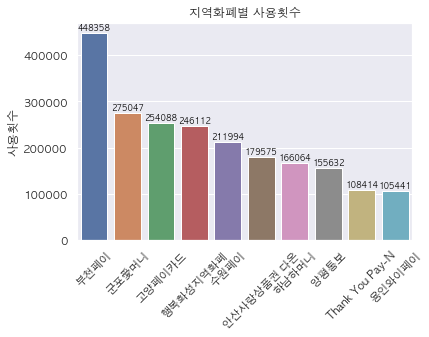

In [5]:
'''
1. 시군단위 지역화폐 사용빈도
2. 연령별 지역화폐 사용빈도
'''
# 상품별 조사
sort_by_item = df_age.groupby('결제상품명').sum().reset_index().sort_values(by='사용빈도', ascending=False)
g = sns.barplot(data=sort_by_item.head(10), x='결제상품명', y='사용빈도')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title("지역화폐별 사용횟수")
g.set_xlabel("")
g.set_ylabel("사용횟수")
for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

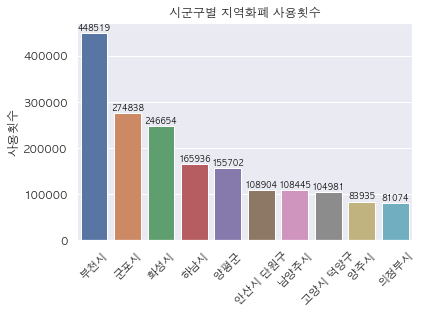

In [6]:
# 지역별 조사
sort_by_loc = df_age.groupby('시군구명').sum().reset_index().sort_values(by='사용빈도', ascending=False)
g = sns.barplot(data=sort_by_loc.head(10), x='시군구명', y='사용빈도')
g.set_title("시군구별 지역화폐 사용횟수")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_xlabel("")
g.set_ylabel("사용횟수")
for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [7]:
# 시군명 추출
df_age['시군명'] = df_age['시군구명'].map(lambda x: x.split(" ")[0])

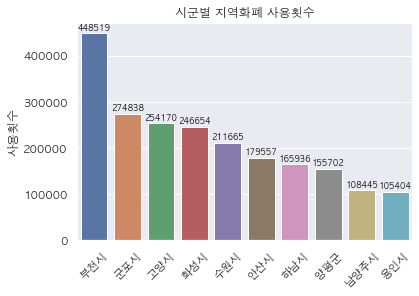

In [8]:
# 지역별 조사 (시군 기준)
sort_by_loc = df_age.groupby('시군명').sum().reset_index().sort_values(by='사용빈도', ascending=False)
g = sns.barplot(data=sort_by_loc.head(10), x='시군명', y='사용빈도')
g.set_title("시군별 지역화폐 사용횟수")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_xlabel("")
g.set_ylabel("사용횟수")
for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [9]:
# Thank You Pay-N 시군별 사용현황
# = 남양주시 지역화폐
# sort_by_loc = df_age.loc[df_age['결제상품명'] == 'Thank You Pay-N', :].groupby('시군명').sum()

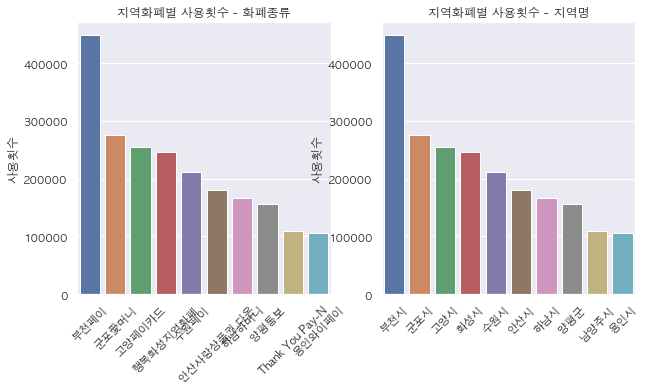

In [10]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(ax=ax[0], data=sort_by_item.head(10), x='결제상품명', y='사용빈도')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_title("지역화폐별 사용횟수 - 화폐종류")
ax[0].set_xlabel("")
ax[0].set_ylabel("사용횟수")
for p in ax[0].patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

sns.barplot(ax=ax[1], data=sort_by_loc.head(10), x='시군명', y='사용빈도')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_title("지역화폐별 사용횟수 - 지역명")
ax[1].set_xlabel("")
ax[1].set_ylabel("사용횟수")
for p in ax[1].patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [11]:
df_age.groupby(['시군명', '결제상품명']).sum()

사용빈도
시군명 결제상품명                  
가평군 Thank You Pay-N       3
    가평사랑상품권           13098
    고양페이카드                1
    수원페이                  1
    오산화폐 오색전              1
...                     ...
화성시 오산화폐 오색전             16
    용인와이페이               15
    의정부사랑카드               9
    행복화성지역화폐         245919
    행복화성지역화폐_화이트        555

[276 rows x 1 columns]

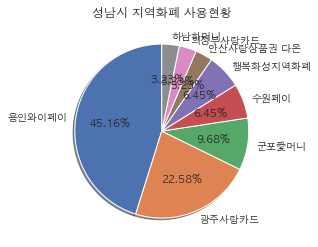

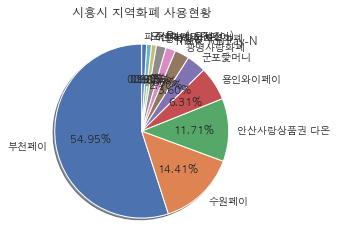

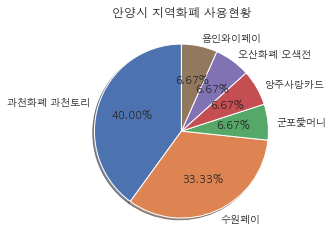

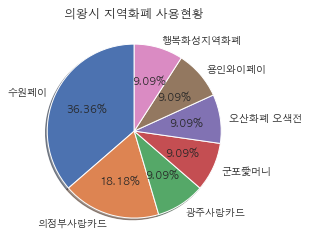

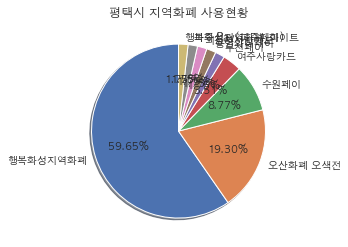

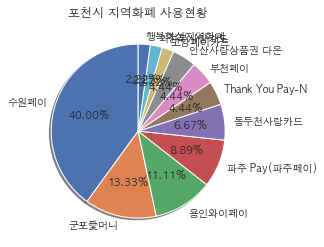

In [12]:
various_loc_list = []
for group in df_age.groupby(['시군명']):
    tmp = group[1].groupby(['결제상품명']).sum().sort_values(by='사용빈도', ascending=False)
    if (tmp['사용빈도'].max() / tmp['사용빈도'].sum() > 0.99):
        continue
    else:
        various_loc_list.append(group[0])
    plt.pie(tmp['사용빈도'],
            labels=tmp.index,
            autopct='%1.2f%%',
            shadow=True,
            startangle=90,
            textprops={'fontsize': 10})
    plt.title(f'{group[0]} 지역화폐 사용현황')
    plt.show()

In [13]:
less_than_10000 = sort_by_loc.loc[sort_by_loc['사용빈도'] < 10000]['시군명'].values
less_than_10000

array(['시흥시', '평택시', '포천시', '성남시', '안양시', '의왕시', '김포시'], dtype=object)

In [14]:
# drop rare data
df_age_rare = pd.DataFrame()
for e in less_than_10000:
    df_age_rare = pd.concat([df_age_rare, df_age.loc[df_age['시군명'] == e, :]])
df_age.drop(df_age_rare.index, inplace=True)

In [15]:
sort_by_loc = df_age.groupby('시군명').sum().reset_index().sort_values(by='사용빈도', ascending=False)

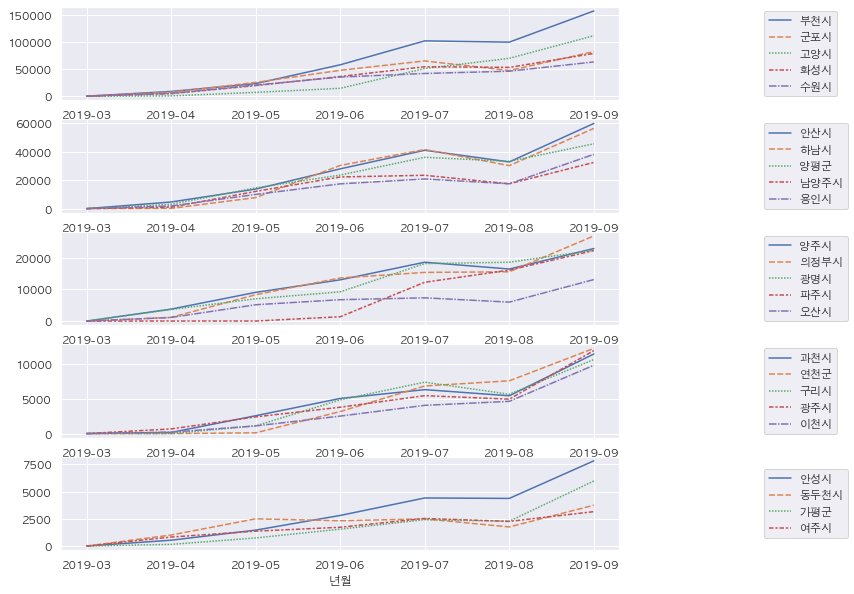

In [16]:
# 2019.03 ~ 2019.09
tmp = df_age.groupby(['시군명', '년월']).sum().reset_index()
df_age_month = tmp.pivot_table('사용빈도', ['시군명'], '년월').fillna(0)
f, ax = plt.subplots(5,1, figsize=(10, 10))
for i in range(5):
    sns.lineplot(ax=ax[i], data=df_age_month.T[sort_by_loc['시군명'][5*i:5*(i+1)]])
    ax[i].legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

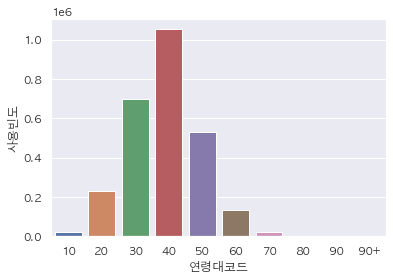

In [17]:
sns.barplot(data=df_age.groupby('연령대코드').sum().reset_index(), x='연령대코드', y='사용빈도')
plt.show()

In [18]:
df_age.groupby('연령대코드').sum()

,사용빈도
연령대코드,
10,23004
20,230337
30,696088
40,1052306
50,528024
60,133045
70,23121
80,2770
90,94


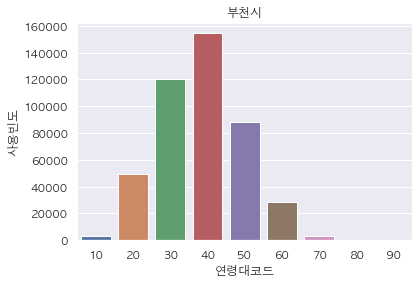

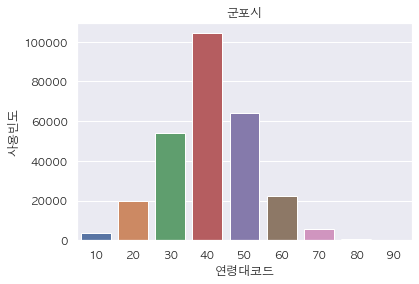

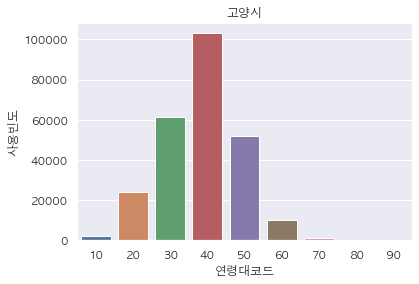

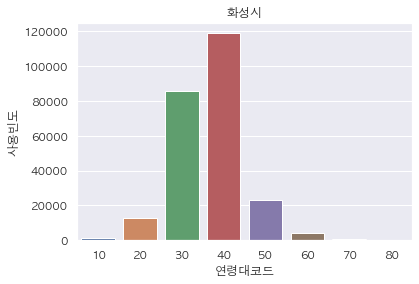

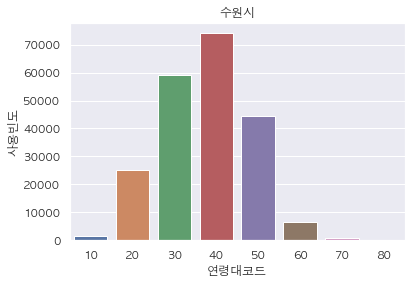

In [19]:
for i in range(5):
    tmp = df_age.loc[df_age['시군명'] == sort_by_loc['시군명'].values[i]]
    g = sns.barplot(data=tmp.groupby('연령대코드').sum().reset_index(), x='연령대코드', y='사용빈도')
    g.set_title(sort_by_loc['시군명'].values[i])
    plt.show()

In [20]:
df_lcrcy_setle = pd.read_csv('TP_LCRCY_SETLE_AMOUNT_CHNGE.csv')

In [21]:
df_lcrcy_setle.drop(df_lcrcy_setle.loc[df_lcrcy_setle['시도명'] == '서울특별시'].index, inplace=True)

In [22]:
df_lcrcy_setle.drop(['결제변화비율', '전월결제금액'], axis=1, inplace=True)

In [23]:
df_lcrcy_setle['시군구명'] = df_lcrcy_setle['시군구명'].map(lambda x: x.split(" ")[0])

In [24]:
df_lcrcy_setle.head(10)

,분석인덱스,시도명,시군구명,행정동명,일반결제년월,결제금액
0,0,경기도,가평군,가평읍,2019-09,19073066
1,1,경기도,가평군,가평읍,2019-10,68118300
2,2,경기도,가평군,가평읍,2019-11,54758044
3,3,경기도,가평군,가평읍,2019-12,77461979
4,4,경기도,가평군,가평읍,2020-01,88133670
5,5,경기도,가평군,가평읍,2020-02,85119706
6,6,경기도,가평군,가평읍,2020-03,118033641
7,7,경기도,가평군,가평읍,2020-05,186650
8,8,경기도,가평군,가평읍,2020-06,96900
9,9,경기도,가평군,북면,2019-09,536860


In [25]:
df_lcrcy_setle.groupby('시군구명').sum().sort_values(by='결제금액', ascending=False)

,분석인덱스,결제금액
시군구명,,
고양시,55678,24455791389
부천시,66325,15534613414
화성시,588729,15016611522
안산시,258349,13772094603
하남시,291480,13163933853
군포시,53207,10278200884
수원시,384615,9952160689
용인시,551055,9607127396
광주시,42427,9319555769


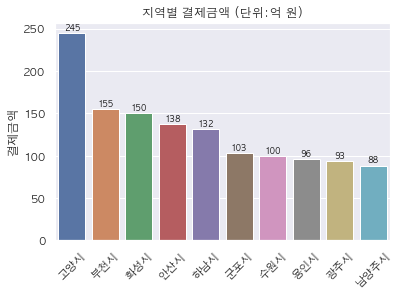

In [73]:
g = sns.barplot(data=(df_lcrcy_setle.groupby('시군구명').sum() / 100000000).sort_values(by='결제금액', ascending=False).reset_index().head(10), x='시군구명', y='결제금액')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title("지역별 결제금액 (단위:억 원)")
g.set_xlabel("")
g.set_ylabel("결제금액")
for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

### 지역별 지역화폐 사용량 및 지역별 소상공인 분포
경기도 지역별 결제현황 및 상권업종대분류 대비 상가 건수   
2019.10 ~ 2020.06

In [27]:
df_lcrcy_use = pd.read_csv('TP_LCRCY_USE_ND_INDUTY_DISTRB.csv')

In [28]:
df_lcrcy_use.head()

,분석인덱스,가맹점우편번호,성별코드,연령대코드,결제수,업종대분류명,상가수
0,0,10125,M,40,1,C제조업,15
1,1,10125,M,40,1,E하수·폐기물처리;원료재생및환경복원업,1
2,2,10125,M,40,1,F건설업,5
3,3,10125,M,40,1,G도매및소매업,52
4,4,10125,M,40,1,H운수업,9


In [29]:
category_list = list(set(df_lcrcy_use['업종대분류명']))
category_dict = {}
for e in category_list:
    if e == '기타':
        category_dict['O'] = e
    else:
        category_dict[e[0]] = e[1:]
category_dict

{'L': '부동산업및임대업',
 'T': '가구내고용활동및달리분류되지않은자가소비생산',
 'H': '운수및창고업',
 'M': '전문;과학및기술서비스업',
 'J': '출판;영상;방송통신및정보서비스업',
 'O': '공공행정;국방및사회보장행정',
 'Q': '보건업및사회복지서비스업',
 'A': '농업;임업및어업',
 'K': '금융및보험업',
 'S': '협회및단체;수리및기타개인서비스업',
 'P': '교육서비스업',
 'I': '숙박및음식점업',
 'R': '예술;스포츠및여가관련서비스업',
 'D': '전기;가스;증기및수도사업',
 'B': '광업',
 'G': '도매및소매업',
 'F': '건설업',
 'N': '사업시설관리및사업지원서비스업',
 'C': '제조업',
 'E': '하수·폐기물처리;원료재생및환경복원업'}

In [30]:
category_dict

{'L': '부동산업및임대업',
 'T': '가구내고용활동및달리분류되지않은자가소비생산',
 'H': '운수및창고업',
 'M': '전문;과학및기술서비스업',
 'J': '출판;영상;방송통신및정보서비스업',
 'O': '공공행정;국방및사회보장행정',
 'Q': '보건업및사회복지서비스업',
 'A': '농업;임업및어업',
 'K': '금융및보험업',
 'S': '협회및단체;수리및기타개인서비스업',
 'P': '교육서비스업',
 'I': '숙박및음식점업',
 'R': '예술;스포츠및여가관련서비스업',
 'D': '전기;가스;증기및수도사업',
 'B': '광업',
 'G': '도매및소매업',
 'F': '건설업',
 'N': '사업시설관리및사업지원서비스업',
 'C': '제조업',
 'E': '하수·폐기물처리;원료재생및환경복원업'}

In [31]:
df_lcrcy_use.loc[df_lcrcy_use['업종대분류명'] == '기타']

,분석인덱스,가맹점우편번호,성별코드,연령대코드,결제수,업종대분류명,상가수
7381,7381,10257,F,10,1,기타,1
7394,7394,10257,F,20,9,기타,1
7407,7407,10257,F,30,29,기타,1
7420,7420,10257,F,40,45,기타,1
7433,7433,10257,F,50,25,기타,1
...,...,...,...,...,...,...,...
491728,491728,18108,M,40,1340,기타,1
491742,491742,18108,M,50,385,기타,1
491756,491756,18108,M,60,108,기타,1
491770,491770,18108,M,70,8,기타,1


In [32]:
df_lcrcy_use['업종대분류명'] = df_lcrcy_use['업종대분류명'].apply(lambda x: x[0])

In [33]:
df_lcrcy_use.head()

,분석인덱스,가맹점우편번호,성별코드,연령대코드,결제수,업종대분류명,상가수
0,0,10125,M,40,1,C,15
1,1,10125,M,40,1,E,1
2,2,10125,M,40,1,F,5
3,3,10125,M,40,1,G,52
4,4,10125,M,40,1,H,9


In [34]:
tmp = df_lcrcy_use.groupby('업종대분류명').sum()
tmp['비율'] = tmp['결제수'] / tmp['상가수']
tmp

,분석인덱스,가맹점우편번호,결제수,상가수,비율
업종대분류명,,,,,
A,1942115676,108662340,976395,10930,89.331656
B,81070344,5969917,61098,488,125.200820
C,12887177167,693015825,7353454,538290,13.660767
D,238034778,14310296,73167,1112,65.797662
E,1709956649,95152232,931261,8651,107.647786
F,11246395147,607948881,6567535,183473,35.795648
G,14346527016,768118777,7775634,1864663,4.169994
H,11856934216,633386707,6774803,274128,24.714013
I,14077910904,754253521,7745160,1349203,5.740545


### 2019년 3~9월 경기지역화폐 일반발행카드의 주간 결제금액
2019.3 ~ 2019.9

In [35]:
df_tc_lc = pd.read_csv('TC_LC_GNRL_WIK_SETLE_INFO_FREE/KNI_TC_LC_GNRL_WIK_SETLE_INFO_20191211164714.csv')


In [36]:
df_tc_lc.drop(['가맹점업종명', '가맹점우편번호', '가맹점번호', '결제금액'], axis=1, inplace=True)
df_tc_lc.head(10)

,일반주간결제시작일자,일반주간결제종료일자,성별코드,연령대코드,결제상품ID,카드번호,회원코드,결제상품명
0,2019-02-25,2019-03-03,F,40,140000020000,M083dgi9qPSN6PfXOLoXUT7DfwSRLFfM/zAAKbsAdsc=,3006281152,광명사랑화폐
1,2019-02-25,2019-03-03,F,70,140000020000,FMiGMS6uZ6ZKTieGmWORIwrVfoqD2RRl0t31i1uwToM=,3008382175,광명사랑화폐
2,2019-02-25,2019-03-03,F,50,140000020000,XjSxP3GEscvnjPIjogCpRwIADX8NDVRYPiuFBBwAzCA=,3011731128,광명사랑화폐
3,2019-02-25,2019-03-03,F,60,140000020000,EMYQngLVJceNFDlQakT4SsYqPhca4i1Ftz6P9BtfPO8=,3002790278,광명사랑화폐
4,2019-02-25,2019-03-03,M,60,140000020000,HWCyGLTjSnB0PxeY0EmoJnbCeiDWVPH6ZB3ssn68L1A=,3007077192,광명사랑화폐
5,2019-02-25,2019-03-03,M,40,140000020000,QqB6c9QChHJZMkjUufrtSAyXXLh0m+9R8dNNMtn+Xwk=,3002056422,광명사랑화폐
6,2019-02-25,2019-03-03,F,60,140000020000,RGt3eoloSlTRKHnFx9Os8aN4HFBj/FkdmydCOQKBIz0=,3002070429,광명사랑화폐
7,2019-02-25,2019-03-03,F,20,140000020000,aCPAPD53sAOwn/bzfi/MMb5HHFYBkj3wejlz/Iuecvs=,3001935573,광명사랑화폐
8,2019-02-25,2019-03-03,F,30,140000020000,6feKz6hb1zkLjc6HJA0/lhj1S75f6SeB66RPJttoRds=,3001937356,광명사랑화폐
9,2019-02-25,2019-03-03,M,40,140000020000,vGOg6QJJXb8+xrt6hIxmxn81ud/etQLzSxxB5uQMLFI=,3001933959,광명사랑화폐


In [37]:
df_tc_lc['일반주간결제시작일자'] = df_tc_lc['일반주간결제시작일자'].map(lambda x: x[:-3])
df_tc_lc['일반주간결제종료일자'] = df_tc_lc['일반주간결제종료일자'].map(lambda x: x[:-3])

df_tc_lc.head(10)

,일반주간결제시작일자,일반주간결제종료일자,성별코드,연령대코드,결제상품ID,카드번호,회원코드,결제상품명
0,2019-02,2019-03,F,40,140000020000,M083dgi9qPSN6PfXOLoXUT7DfwSRLFfM/zAAKbsAdsc=,3006281152,광명사랑화폐
1,2019-02,2019-03,F,70,140000020000,FMiGMS6uZ6ZKTieGmWORIwrVfoqD2RRl0t31i1uwToM=,3008382175,광명사랑화폐
2,2019-02,2019-03,F,50,140000020000,XjSxP3GEscvnjPIjogCpRwIADX8NDVRYPiuFBBwAzCA=,3011731128,광명사랑화폐
3,2019-02,2019-03,F,60,140000020000,EMYQngLVJceNFDlQakT4SsYqPhca4i1Ftz6P9BtfPO8=,3002790278,광명사랑화폐
4,2019-02,2019-03,M,60,140000020000,HWCyGLTjSnB0PxeY0EmoJnbCeiDWVPH6ZB3ssn68L1A=,3007077192,광명사랑화폐
5,2019-02,2019-03,M,40,140000020000,QqB6c9QChHJZMkjUufrtSAyXXLh0m+9R8dNNMtn+Xwk=,3002056422,광명사랑화폐
6,2019-02,2019-03,F,60,140000020000,RGt3eoloSlTRKHnFx9Os8aN4HFBj/FkdmydCOQKBIz0=,3002070429,광명사랑화폐
7,2019-02,2019-03,F,20,140000020000,aCPAPD53sAOwn/bzfi/MMb5HHFYBkj3wejlz/Iuecvs=,3001935573,광명사랑화폐
8,2019-02,2019-03,F,30,140000020000,6feKz6hb1zkLjc6HJA0/lhj1S75f6SeB66RPJttoRds=,3001937356,광명사랑화폐
9,2019-02,2019-03,M,40,140000020000,vGOg6QJJXb8+xrt6hIxmxn81ud/etQLzSxxB5uQMLFI=,3001933959,광명사랑화폐


### 남녀별 소비패턴 현황
2019년 경기도 시군구 남녀별 월 단위 소비패턴 현황

In [38]:
df_mwmn = pd.read_csv('TP_MWMN_ACCTO_CNSMP_PTTRN.csv')

In [39]:
df_mwmn.head(10)

,년월,시도명,시군구명,성별코드,가맹점업종명,총결제금액
0,2019-03,경기도,양주시,F,유통업 영리,7600
1,2019-03,경기도,양주시,F,일반휴게음식,26200
2,2019-04,경기도,가평군,F,회원제형태,10000
3,2019-04,경기도,가평군,F,기타,10450
4,2019-04,경기도,가평군,F,신변잡화,45500
5,2019-04,경기도,가평군,F,음료식품,49100
6,2019-04,경기도,가평군,F,의원,50000
7,2019-04,경기도,가평군,F,레저업소,66000
8,2019-04,경기도,가평군,F,문화.취미,79000
9,2019-04,경기도,가평군,F,보건위생,141600


In [40]:
df_mwmn['시군명'] = df_mwmn['시군구명'].map(lambda x: x.split(" ")[0])

In [41]:
df_mwmn.head(10)

,년월,시도명,시군구명,성별코드,가맹점업종명,총결제금액,시군명
0,2019-03,경기도,양주시,F,유통업 영리,7600,양주시
1,2019-03,경기도,양주시,F,일반휴게음식,26200,양주시
2,2019-04,경기도,가평군,F,회원제형태,10000,가평군
3,2019-04,경기도,가평군,F,기타,10450,가평군
4,2019-04,경기도,가평군,F,신변잡화,45500,가평군
5,2019-04,경기도,가평군,F,음료식품,49100,가평군
6,2019-04,경기도,가평군,F,의원,50000,가평군
7,2019-04,경기도,가평군,F,레저업소,66000,가평군
8,2019-04,경기도,가평군,F,문화.취미,79000,가평군
9,2019-04,경기도,가평군,F,보건위생,141600,가평군


In [42]:
df_mwmn.groupby('시군명').sum().sort_values(by='총결제금액', ascending=False)

,총결제금액
시군명,
부천시,9600328514
고양시,7157467122
화성시,7034069837
군포시,6430662023
수원시,4788565865
안산시,4431067749
하남시,4425459595
양평군,4224065185
용인시,2748018389


In [43]:
df_mwmn.groupby(['성별코드', '가맹점업종명']).sum()

총결제금액
성별코드 가맹점업종명            
F    가구       226049623
     건강식품      93828718
     건축자재      36000856
     광학제품      47343248
     기타        43392550
...                 ...
M    전기제품      17489680
     주방용구      12019770
     직물        37086974
     학원      3366326377
     회원제형태    701519101

[68 rows x 1 columns]

In [44]:
category_dict

{'L': '부동산업및임대업',
 'T': '가구내고용활동및달리분류되지않은자가소비생산',
 'H': '운수및창고업',
 'M': '전문;과학및기술서비스업',
 'J': '출판;영상;방송통신및정보서비스업',
 'O': '공공행정;국방및사회보장행정',
 'Q': '보건업및사회복지서비스업',
 'A': '농업;임업및어업',
 'K': '금융및보험업',
 'S': '협회및단체;수리및기타개인서비스업',
 'P': '교육서비스업',
 'I': '숙박및음식점업',
 'R': '예술;스포츠및여가관련서비스업',
 'D': '전기;가스;증기및수도사업',
 'B': '광업',
 'G': '도매및소매업',
 'F': '건설업',
 'N': '사업시설관리및사업지원서비스업',
 'C': '제조업',
 'E': '하수·폐기물처리;원료재생및환경복원업'}

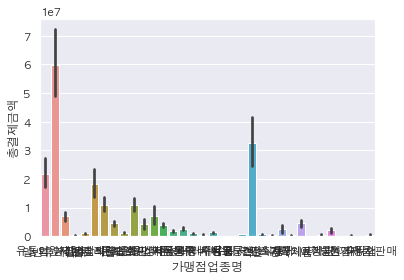

In [45]:
g = sns.barplot(x='가맹점업종명', y='총결제금액', data=df_mwmn.loc[df_mwmn['성별코드'] == 'F'])

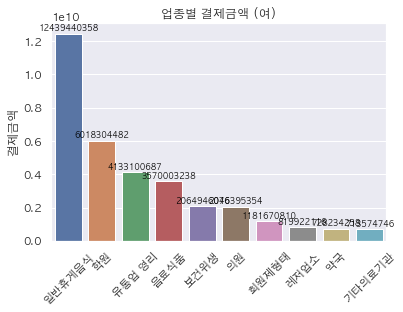

In [46]:
g = sns.barplot(data=df_mwmn.loc[df_mwmn['성별코드'] == 'F'].groupby('가맹점업종명').sum().sort_values(by='총결제금액', ascending=False).reset_index().head(10), x='가맹점업종명', y='총결제금액')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title("업종별 결제금액 (여)")
g.set_xlabel("")
g.set_ylabel("결제금액")
for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


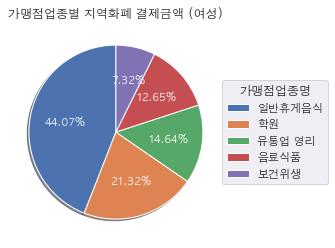

In [65]:
tmp = df_mwmn.loc[df_mwmn['성별코드'] == 'F'].groupby('가맹점업종명').sum().sort_values(by='총결제금액', ascending=False).reset_index().head(5)
wedges, texts, autotexts = plt.pie(
    data=tmp,
    x=tmp['총결제금액'],
    autopct='%1.2f%%',
    shadow=True,
    startangle=90,
    textprops={'fontsize': 10, 'color':'w', 'weight': 'bold'})
plt.title('가맹점업종별 지역화폐 결제금액 (여성)')
plt.legend(wedges, tmp['가맹점업종명'], title='가맹점업종명', loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

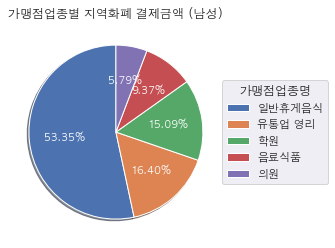

In [66]:
tmp = df_mwmn.loc[df_mwmn['성별코드'] == 'M'].groupby('가맹점업종명').sum().sort_values(by='총결제금액', ascending=False).reset_index().head(5)
wedges, texts, autotexts = plt.pie(
    data=tmp,
    x=tmp['총결제금액'],
    autopct='%1.2f%%',
    shadow=True,
    startangle=90,
    textprops={'fontsize': 10, 'color':'w', 'weight': 'bold'})
plt.title('가맹점업종별 지역화폐 결제금액 (남성)')
plt.legend(wedges, tmp['가맹점업종명'], title='가맹점업종명', loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()